## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
combined_data['Mouse ID'].value_counts()

g989    13
y769    10
a275    10
o795    10
e584    10
        ..
v199     1
d133     1
x336     1
t573     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
#Check for duplicates
duplicate_df=combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"],keep = False)==True]
duplicate_df=duplicate_df["Mouse ID"].drop_duplicates()
duplicate_df=pd.DataFrame(duplicate_df)
duplicate_df

,Mouse ID
908,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df_data=pd.DataFrame(duplicate_df)
duplicated=duplicated_df_data.merge(combined_data, on= "Mouse ID")
duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=combined_data.copy()
clean_dataframe=clean_dataframe.loc[~(clean_dataframe["Mouse ID"].isin(duplicate_df["Mouse ID"]))]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count2=clean_dataframe["Mouse ID"].nunique()
mice_count2


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,\
#and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean=clean_dataframe.groupby('Drug Regimen').mean().iloc[:,3]
median=clean_dataframe.groupby('Drug Regimen').median().iloc[:,3]
var=clean_dataframe.groupby('Drug Regimen').var().iloc[:,3]
std=clean_dataframe.groupby('Drug Regimen').std().iloc[:,3]
sem=clean_dataframe.groupby('Drug Regimen').sem().iloc[:,5]


tumorvolumesum=pd.DataFrame({
                'Mean':mean,
                'Median':median,
                'Variance':var,
                'Standard Deviation':std,
                'Standard Error of Mean':sem})
tumorvolumesum


,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_dataframe.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median','var','std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
sum_mouse=clean_dataframe.groupby(["Drug Regimen"]).agg({"Mouse ID":['count']})
sum_mouse_count=clean_dataframe.groupby("Drug Regimen")["Mouse ID"].count()

sex_count=clean_dataframe.groupby(["Sex"]).agg({"Mouse ID":['count']})
#sex_count


<function matplotlib.pyplot.show(*args, **kw)>

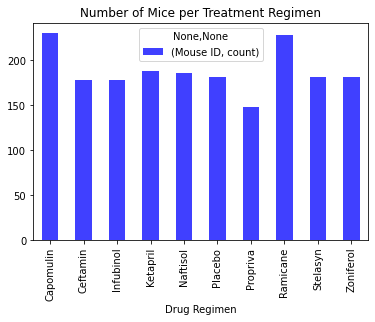

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#clean_dataframe.groupby(["Drug Regimen"]).agg({"Mouse ID":['count']}

sum_mouse.plot(kind='bar',title='Number of Mice per Treatment Regimen',color='b',alpha=.75)
plt.show


In [11]:
drug_regimen=(sum_mouse.index).to_list
drug_regimen

<bound method IndexOpsMixin.tolist of Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')>

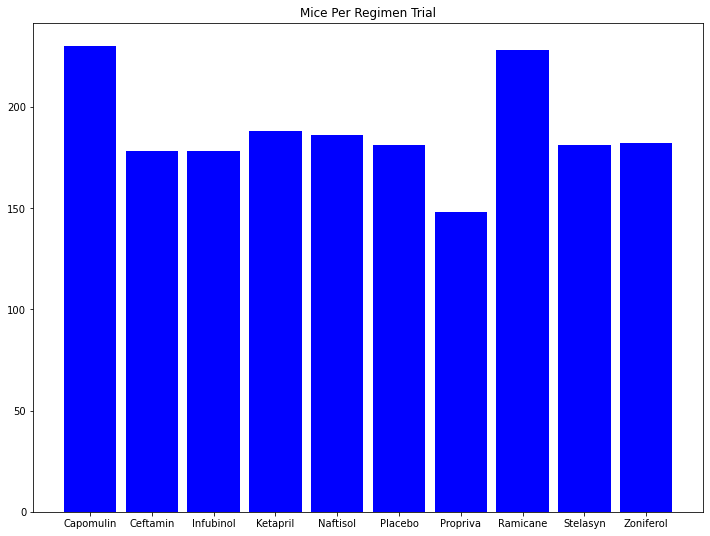

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#y_axis=np.arange(len(sum_mouse))
labels=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
y_axis=(labels)
#plt.xticks(y_axis, rotation="vertical")
plt.figure(figsize=(12,9))
plt.bar(y_axis, sum_mouse_count, color="b", width=.85)
plt.title("Mice Per Regimen Trial")
plt.show()

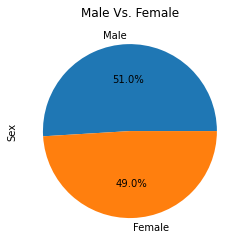

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count1=clean_dataframe['Sex'].value_counts()
sex_count1.plot(kind='pie',autopct='%1.1f%%', title='Male Vs. Female', shadow=False)

<ipython-input-14-adeb735770ee>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sex_count, labels=labels,colors=colors,autopct="%1.1f%%",shadow=False,startangle=90)


<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

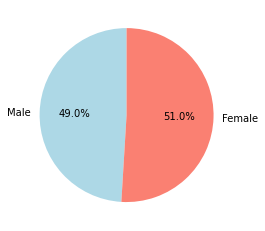

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=["Male","Female"]

colors=["lightblue","salmon"]
plt.pie(sex_count, labels=labels,colors=colors,autopct="%1.1f%%",shadow=False,startangle=90)
plt.pie

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftam
capomulin_df=clean_dataframe.loc[clean_dataframe["Drug Regimen"]=="Capomulin",:]
ramicane_df=clean_dataframe.loc[clean_dataframe["Drug Regimen"]=="Ramicane",:]
infubinol_df=clean_dataframe.loc[clean_dataframe["Drug Regimen"]=="Infubinol",:]
ceftamin_df=clean_dataframe.loc[clean_dataframe["Drug Regimen"]=="Ceftamin",:]

tumor_volume=capomulin_df.groupby("Mouse ID").max()["Timepoint":]
cap_df=pd.DataFrame(tumor_volume)
#cap_df-pd.merge(capomulin_df,cap_df,on=("Mouse ID","Timepoint"),how="right")
cap_df.head
cap_tv = cap_df["Tumor Volume (mm3)"]
quartiles=cap_tv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
low_bound = lowerq-(1.5*iqr)
up_bound = upperq+(1.5*iqr)
print(f"Capomulin outliers would be above {up_bound} or below {low_bound}.")





Capomulin outliers would be above 49.37251379999999 or below 42.376491720000004.


In [16]:
tumor_volume=ramicane_df.groupby("Mouse ID").max()["Timepoint":]
ram_df=pd.DataFrame(tumor_volume)
ram_df-pd.merge(ramicane_df,ram_df,on=("Mouse ID","Timepoint"),how="right")
ram_df.head
ram_tv=ram_df["Tumor Volume (mm3)"]
quartiles=ram_tv.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
low_bound=lowerq-(1.5*iqr)
up_bound=upperq+(1.5*iqr)
print(f"Ramicane outliers would be above {up_bound} or below {low_bound}.")

Ramicane outliers would be above 48.359580925 or below 42.984251445.


In [17]:
tumor_volume=infubinol_df.groupby("Mouse ID").max()["Timepoint":]
inf_df=pd.DataFrame(tumor_volume)
inf_df-pd.merge(infubinol_df,ram_df,on=("Mouse ID","Timepoint"),how="right")
inf_df.head
inf_tv=inf_df["Tumor Volume (mm3)"]
quartiles=inf_tv.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
low_bound=lowerq-(1.5*iqr)
up_bound=upperq+(1.5*iqr)
print(f" Infubinol outliers would be above {up_bound} or below {low_bound}.")


 Infubinol outliers would be above 82.74144559000001 or below 36.83290494999999.


In [18]:
tumor_volume=ceftamin_df.groupby("Mouse ID").max()["Timepoint":]
cef_df=pd.DataFrame(tumor_volume)
cef_df-pd.merge(ceftamin_df,cef_df,on=("Mouse ID","Timepoint"),how="right")
cef_df.head
cef_tv = cef_df["Tumor Volume (mm3)"]
quartiles=cef_tv.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
low_bound=lowerq-(1.5*iqr)
up_bound=upperq+(1.5*iqr)
print(f"Ceftamin outliers would be above {up_bound} or below {low_bound}.")

Ceftamin outliers would be above 87.66645829999999 or below 25.355449580000002.


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#print(cef_tv)

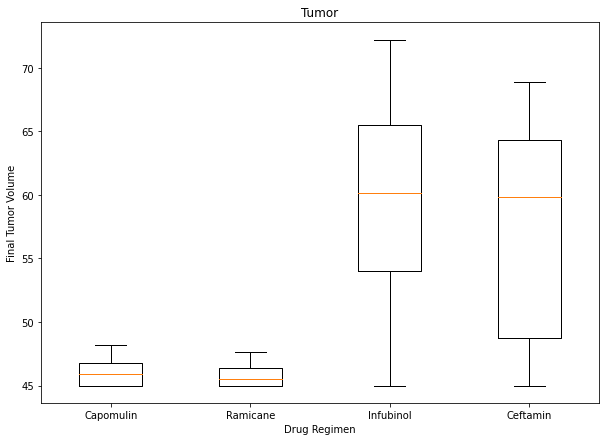

In [20]:
data = [(cap_tv), (ram_tv), (inf_tv),(cef_tv)]

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title('Tumor')
ax.set_ylabel('Final Tumor Volume')
ax.set_xlabel('Drug Regimen')

bp = ax.boxplot(data, labels=["Capomulin",  "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
    

## Line and Scatter Plots

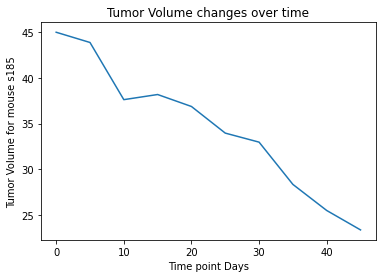

In [21]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df=combined_data[combined_data["Drug Regimen"]=="Capomulin"]
mouse_s185_df=capomulin_df[capomulin_df["Mouse ID"]=="s185"]
capomulin_tv=mouse_s185_df['Tumor Volume (mm3)']
#print(capomulin_tv)
capomulin_tp=mouse_s185_df['Timepoint']
plt.plot(capomulin_tp,capomulin_tv)
plt.xlabel('Time point Days')
plt.ylabel('Tumor Volume for mouse s185')
plt.title('Tumor Volume changes over time')
plt.show()

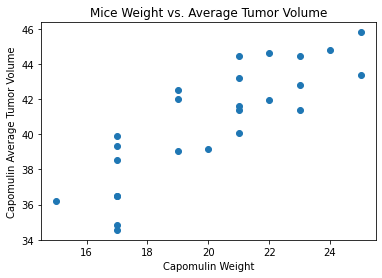

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capomulin_unique=capomulin_df['Mouse ID'].unique()
capomulin_ave=capomulin_df.groupby('Mouse ID').agg(\
        capomulin_avetv=('Tumor Volume (mm3)',np.mean),\
        capomulin_weight=('Weight (g)', np.mean))
                 
plt.scatter(capomulin_ave['capomulin_weight'],capomulin_ave['capomulin_avetv'])
plt.title('Mice Weight vs. Average Tumor Volume')
plt.xlabel('Capomulin Weight')
plt.ylabel('Capomulin Average Tumor Volume')

plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_ave['capomulin_weight'], capomulin_ave ['capomulin_avetv'])[0],2)
print(f"The correlation between mouse wieght and average tumor volume for the capomulin regimen is {correlation}")



The correlation between mouse wieght and average tumor volume for the capomulin regimen is 0.84


The r-squared is: 0.8419363424694718


<function matplotlib.pyplot.show(*args, **kw)>

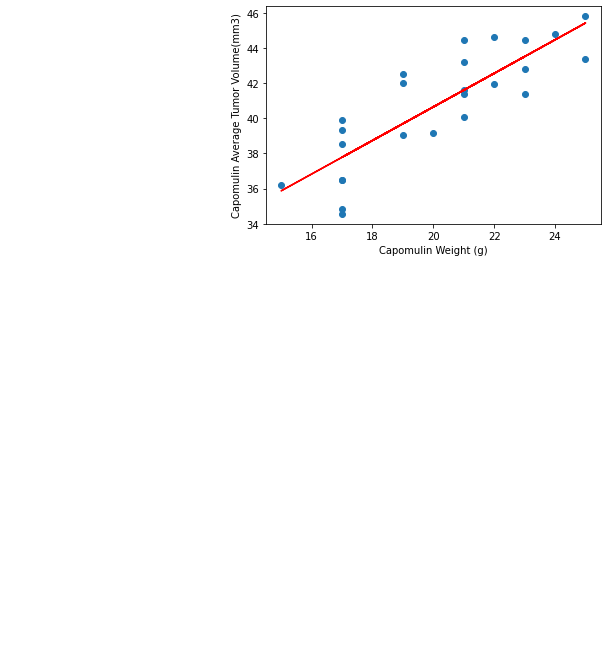

In [24]:
#linear regression
x_values=capomulin_ave['capomulin_weight']
y_values=capomulin_ave['capomulin_avetv']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel("Capomulin Weight (g)")
plt.ylabel('Capomulin Average Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue}")
plt.show